In [32]:
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

### 1. Data exploration:

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [34]:
# Show details of the dataset
# Show the size of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


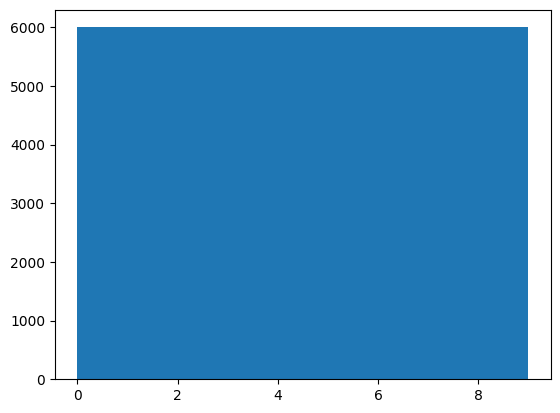

In [35]:
# Show the distribution of the classes
plt.hist(y_train, bins=10)
plt.show()

We can see that the dataset is balanced, each class that the same amount of samples.
Each image is 28x28 pixels and has a value between 0 and 255 (grayscale)

0 : T-shirt/top


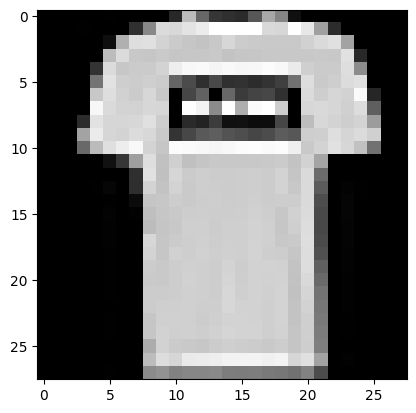

1 : Trouser


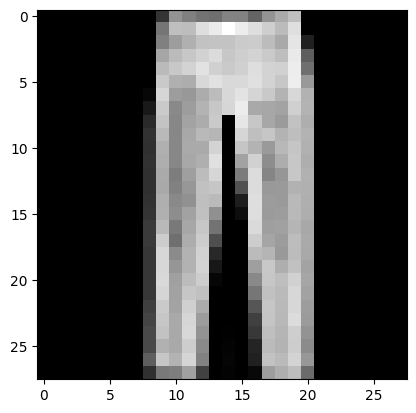

2 : Pullover


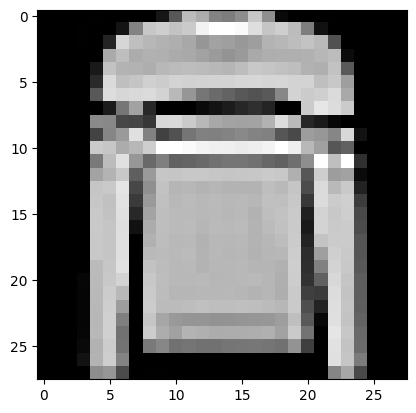

3 : Dress


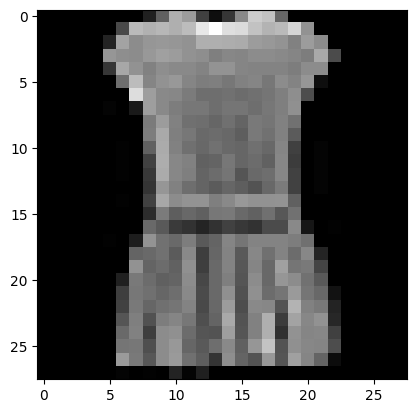

4 : Coat


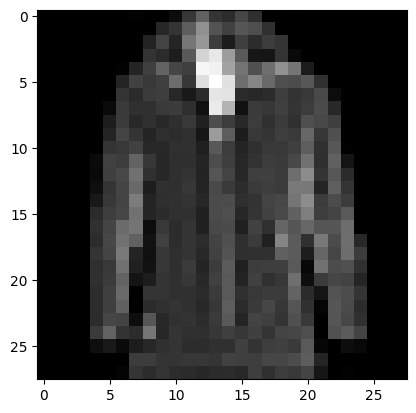

5 : Sandal


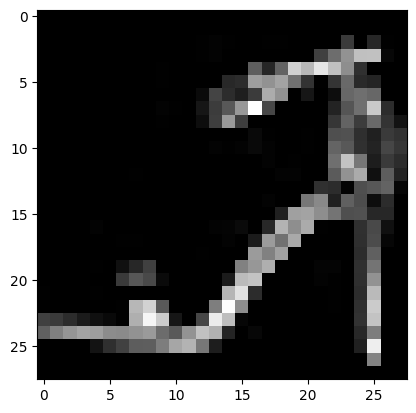

6 : Shirt


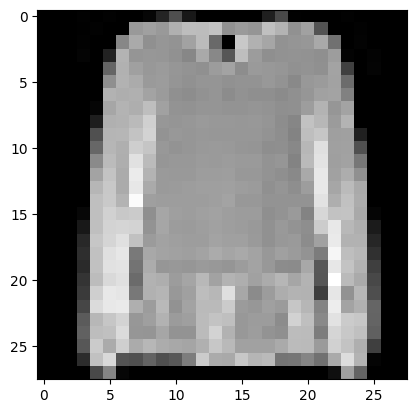

7 : Sneaker


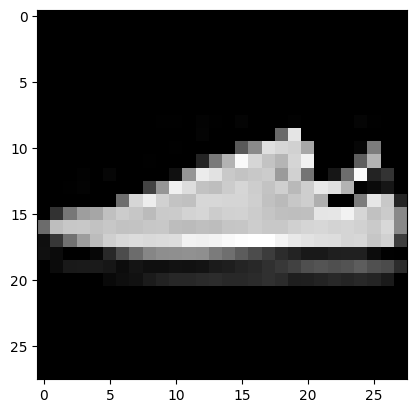

8 : Bag


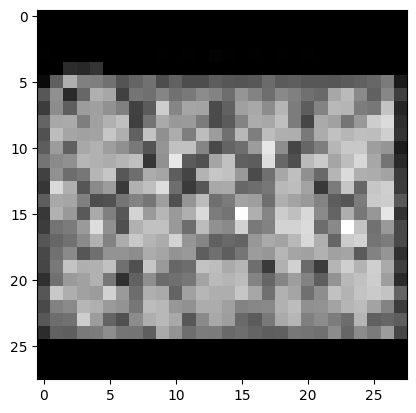

9 : Ankle boot


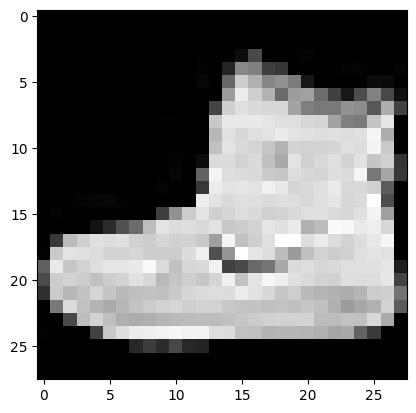

In [36]:
# Plot an image of every class
classes = "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
for i in range(10):
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    print(y_train[y_train == i][0], ":", classes[i])
    plt.show()

In [37]:
# Select a classification metric, such as accuracy or another metric you find more suitable for the problem
# Accuracy is a good metric for this problem because it is a balanced dataset

### 2. Pre-processing:

In [38]:
# Set a random seed for NumPy and Keras for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

In [39]:
# Splitting the training data into training and validation ratio
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [40]:
# Normalize the data to ensure compatibility with the Keras neural networks interface.
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

### 3. Define your initial model:

In [41]:
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method, based on the lab example
model = models.Sequential()
# We add a convolutional layer that has 28 3x3 filters with
# relu activation function.
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# We add a pooling layer that uses the maximum function
# where the filter size is 2x2.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,642 (584.54 KB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Choose a loss function for training the model and reasonable starting hyperparameter values
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 4. Train your model:

In [44]:
# Train your model for ten epochs using the training split of the FashionMnist dataset
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7293 - loss: 0.7338 - val_accuracy: 0.8644 - val_loss: 0.3813
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8670 - loss: 0.3653 - val_accuracy: 0.8835 - val_loss: 0.3209
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8866 - loss: 0.3062 - val_accuracy: 0.8924 - val_loss: 0.2937
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9016 - loss: 0.2677 - val_accuracy: 0.8946 - val_loss: 0.2889
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9116 - loss: 0.2386 - val_accuracy: 0.8958 - val_loss: 0.2890
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9185 - loss: 0.2168 - val_accuracy: 0.8972 - val_loss: 0.2854
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9275 - loss: 0.1941 - val_accuracy: 0.8992 - val_loss: 0.2909
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9361 -

313/313 - 1s - 4ms/step - accuracy: 0.8847 - loss: 0.3760
0.8847000002861023


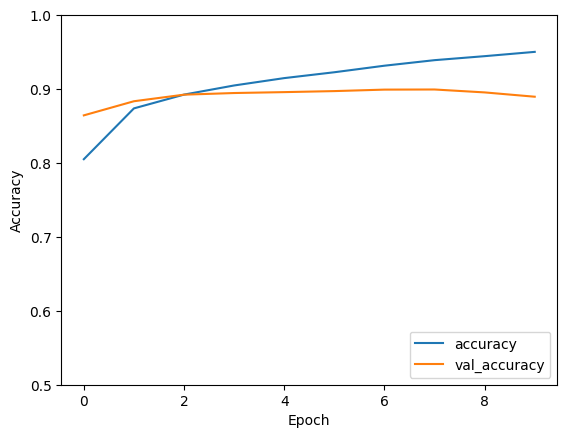

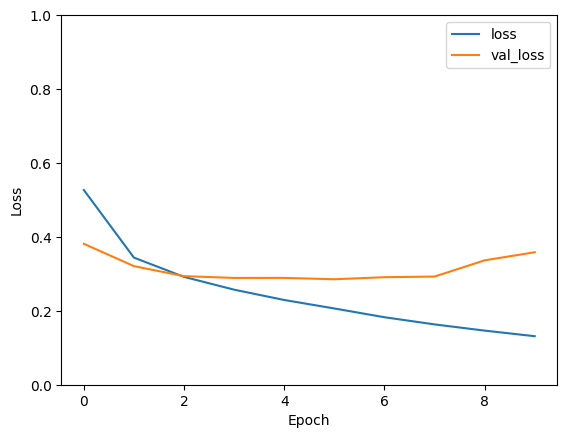

In [45]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

These plots show us that the model is overfitting, the accuracy on the validation set is a lot lower than the training set. We have to finetune the model to prevent overfitting. For the training and validation ratio, we see that both curves are smooth, meaning that the validation size is not too small.

5. Hyperparameter tuning:

In [46]:
# Create a new improved model by tuning and hyperparameters, use the same model as earlier, but add dropout layers after the pooling layers and the dense layer for regularization
# There are plenty of other regularization techniques, but because of time reasons we only looked at the effect of dropout
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
def create_model(dropout_rate=0.2 ,filters=64):
    model_creation = models.Sequential()
    # We add a convolutional layer that has 28 3x3 filters with
    # relu activation function.
    model_creation.add(layers.Input(shape=(28, 28, 1)))
    model_creation.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    model_creation.add(layers.Dropout(dropout_rate))  # Add Dropout after pooling layer for regularization
    # We add a pooling layer that uses the maximum function
    # where the filter size is 2x2.
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Dropout(dropout_rate))  # Add Dropout after pooling layer for regularization
    model_creation.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    model_creation.add(layers.Flatten())
    model_creation.add(layers.Dense(128, activation='relu'))
    model_creation.add(layers.Dropout(2*dropout_rate))  # Add Dropout after dense layer for regularization
    model_creation.add(layers.Dense(10))
    return model_creation

In [47]:
# Implement the Keras EarlyStopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.005,
    restore_best_weights=True,
)

In [48]:
# Select three hyperparameters and conduct a rough parameter search to fine-tune 
learning_rate = 0.001  # This is a hyperparameter
batch_size = 64  # Another hyperparameter
filters = 64 # Another hyperparameter

In [49]:
# Perform a grid search over the hyperparameters, using the validation set to select the best parameters
results = pd.DataFrame(columns=['filters', 'kernel_size', 'pool_size', 'dense_units', 'accuracy', 'loss', 'batch_size', 'learning_rate', 'history', 'model', 'epochs', 'early_stopping'])
for filters in [16,32,64,128]:
    for learning_rate in [0.001, 0.0001, 0.0005]:
        print()
        print("Filters: ", filters)
        print("Learning rate: ", learning_rate)
        # Implement the Keras EarlyStopping callback.
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            min_delta=0.005,
            restore_best_weights=True,
        )
        model = create_model(0.2,filters)
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_val, y_val),batch_size = batch_size, callbacks=[early_stopping])
        val_loss, val_acc = model.evaluate(x_val,  y_val, verbose=2)
        new_data = pd.DataFrame({'filters': filters, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'accuracy': val_acc,'loss': val_loss, 'batch_size':batch_size, 'learning_rate':learning_rate, 'history':history, 'model': model, 'epochs': len(history.history['accuracy']), 'early_stopping': 0.005}, index=[0]) 
        results = pd.concat([results, new_data], ignore_index=True)


Filters:  16
Learning rate:  0.001
Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5676 - loss: 1.1936 - val_accuracy: 0.8006 - val_loss: 0.5427
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7802 - loss: 0.5843 - val_accuracy: 0.8308 - val_loss: 0.4654
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8082 - loss: 0.5115 - val_accuracy: 0.8459 - val_loss: 0.4234
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8263 - loss: 0.4665 - val_accuracy: 0.8601 - val_loss: 0.3857
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8410 - loss: 0.4319 - val_accuracy: 0.8678 - val_loss: 0.3618
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8479 - loss: 0.4118 - val_accuracy: 0.8747 - val_loss: 0.3465
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8535 - loss: 0.3939 - val_accuracy: 0.8740 - val_loss: 0.3410
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.85

C:\Users\elsha\AppData\Local\Temp\ipykernel_13004\3377781648.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_data], ignore_index=True)


Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2764 - loss: 2.0008 - val_accuracy: 0.7031 - val_loss: 0.9166
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6405 - loss: 0.9738 - val_accuracy: 0.7403 - val_loss: 0.7440
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6922 - loss: 0.8174 - val_accuracy: 0.7552 - val_loss: 0.6739
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7201 - loss: 0.7453 - val_accuracy: 0.7687 - val_loss: 0.6350
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7372 - loss: 0.6960 - val_accuracy: 0.7782 - val_loss: 0.6043
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7478 - loss: 0.6691 - val_accuracy: 0.7872 - val_loss: 0.5793
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7555 - loss: 0.6394 - val_accuracy: 0.7968 - val_loss: 0.5647
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7665 - loss: 0.6193 - val_accuracy: 0

In [50]:
# Print the results of the grid search, and analyse the results
print(results)

   filters kernel_size pool_size dense_units  accuracy      loss batch_size  \
0       16           3         2         128  0.900389  0.274270         64   
1       16           3         2         128  0.862556  0.386328         64   
2       16           3         2         128  0.892611  0.295037         64   
3       32           3         2         128  0.907611  0.246787         64   
4       32           3         2         128  0.884833  0.316416         64   
5       32           3         2         128  0.910778  0.240679         64   
6       64           3         2         128  0.912500  0.239988         64   
7       64           3         2         128  0.904167  0.264951         64   
8       64           3         2         128  0.912278  0.239892         64   
9      128           3         2         128  0.911722  0.240119         64   
10     128           3         2         128  0.914722  0.233066         64   
11     128           3         2         128  0.9165

In [51]:
# Manually select the best model based on the results of the grid search
model = results.iloc[6]['model']
history = results.iloc[6]['history']

313/313 - 2s - 5ms/step - accuracy: 0.9050 - loss: 0.2575
0.9049999713897705


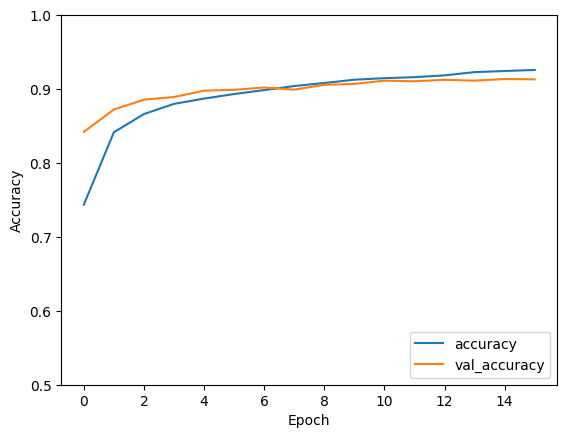

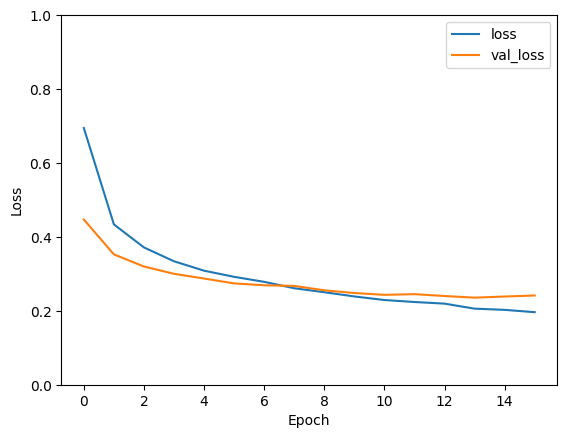

In [52]:
# Plot the learning history of the best model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [53]:
# Save the DataFrame as a CSV file and include it in your package
results.to_csv('csv/classifier_with_regularization.csv')

In [ ]:
# Train the final model using the complete training set and the best hyperparameters
# Combine the training and validation sets
x_train = np.concatenate((x_train, x_val))
y_train = np.concatenate((y_train, y_val))
# Hyperpameters
learning_rate = 0.001  
batch_size = 64  
filters = 64 
model = create_model(0.2,filters)
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Now train without validation
history = model.fit(x_train, y_train, epochs=10, batch_size = batch_size)

Epoch 1/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - accuracy: 0.7609 - loss: 0.6515
Epoch 2/10
2245/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8886 - loss: 0.3029

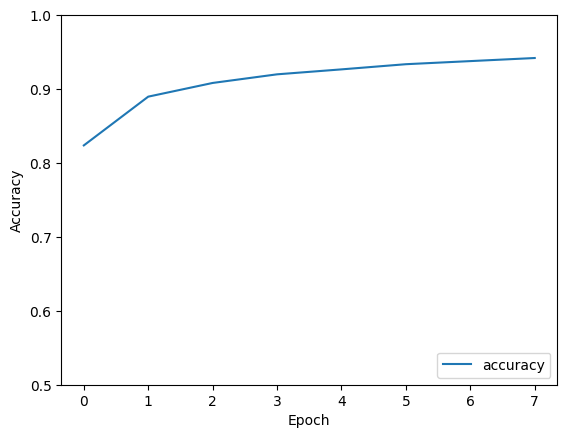

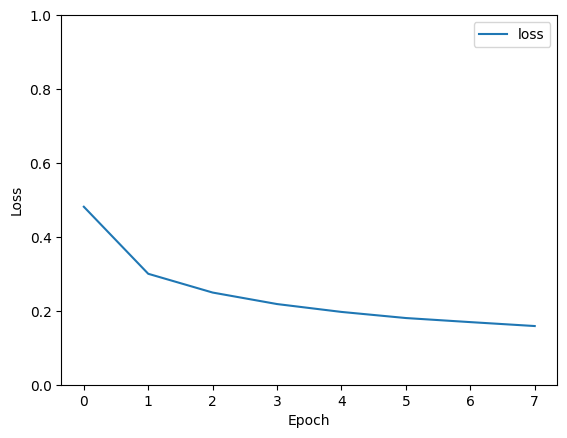

313/313 - 2s - 6ms/step - accuracy: 0.9134 - loss: 0.2578


In [60]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [61]:
# Save the model with the best performance
model.save("model/final_classifier_regularized.h5")
print("Model saved as 'model/final_classifier_regularized.h5'")

Model saved as 'model/final_classifier_regularized.h5'


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


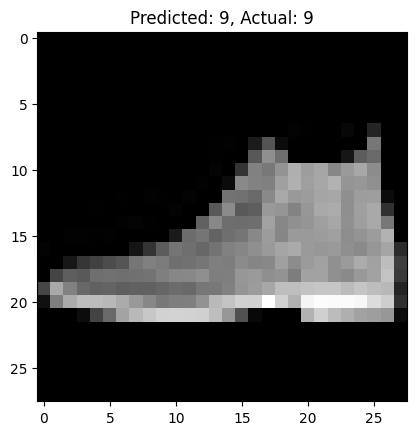

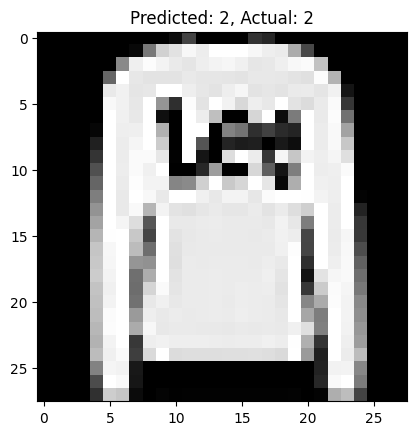

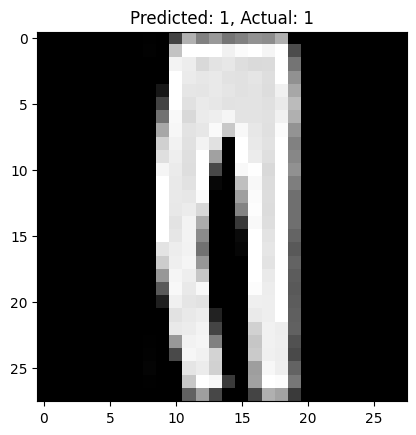

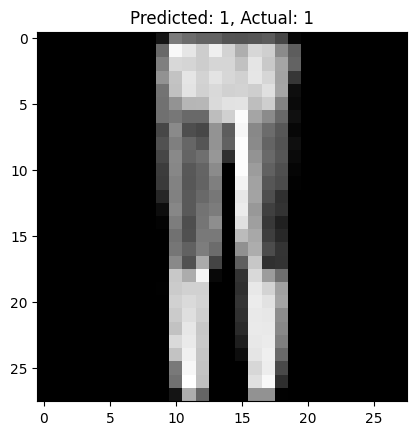

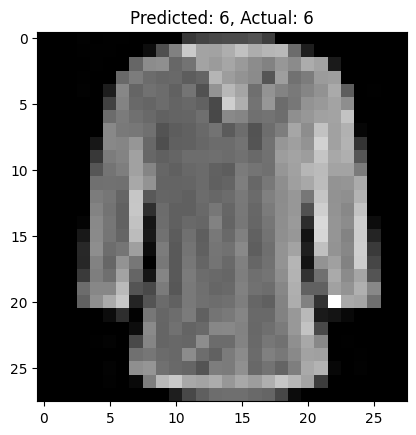

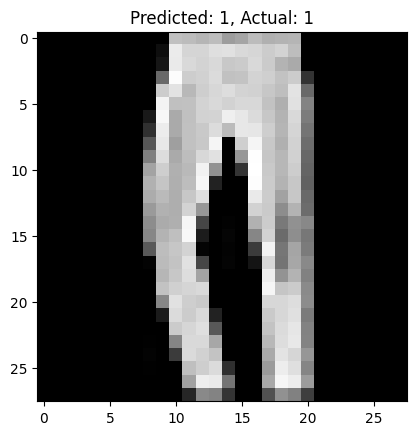

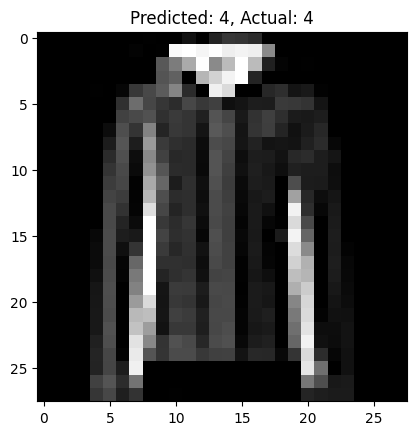

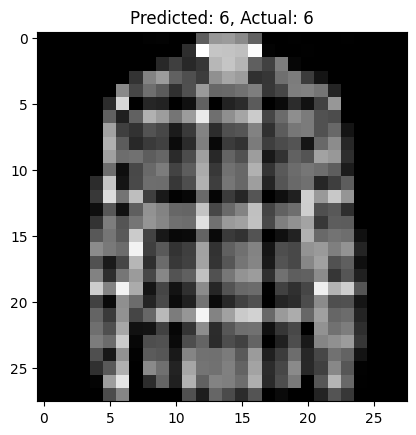

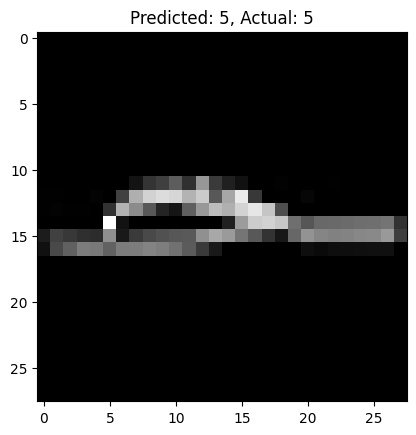

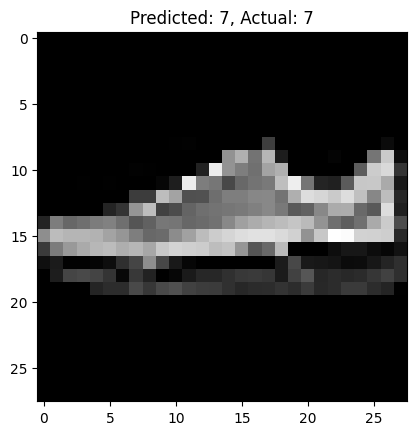

In [62]:
# Plot 10 random samples with their predicted labels
predictions = model.predict(x_test)
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()

In [64]:
# Create a YAML file containing the final values of the hyperparameters, the chosen loss
# and optimizer, and all information to reproduce your training strategy and include it
# in the package.
import yaml
with open('yaml/hyperparameters_classification.yaml', 'w') as file:
    yaml.dump({'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'batch_size':batch_size, 'learning_rate':learning_rate, 'epochs': len(history.history['accuracy']), 'loss_function':'tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)','optimizer':'Adam(learning_rate=learning_rate)','dropout_rate':0.2}, file)